In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from matplotlib import pyplot
import torch
import pandas as pd
import pickle
from os import listdir

In [4]:
w1 = np.load('w1_hebb.npy')
w2 = np.load('w2_hebb.npy')
w3 = np.load('w3_hebb.npy')
param = np.load('param_hebb.npy')
action = np.load('actions_hebb.npy')
arch = [27, 64, 32, 18]


In [5]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]


### Analyse Param 

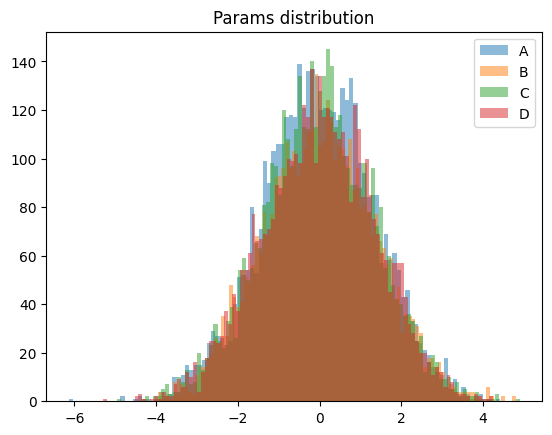

In [6]:
# ABCD
plt.title('Params distribution')
plt.hist(A, bins=100, label='A', alpha=.5)
plt.hist(B, bins=100, label='B', alpha=.5)
plt.hist(C, bins=100, label='C', alpha=.5)
plt.hist(D, bins=100, label='D', alpha=.5)
plt.legend()
plt.show()

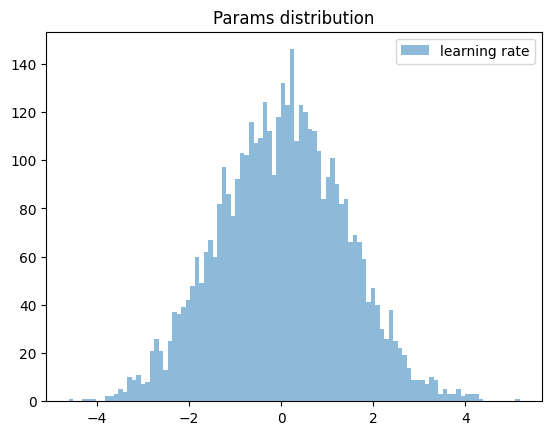

In [7]:
# lr
plt.title('Params distribution')
plt.hist(lr, bins=100, label='learning rate', alpha=.5)
plt.legend()
plt.show()

In [8]:
lr

array([-1.09920991,  0.40957279, -1.68632586, ..., -1.97228871,
        2.00184864,  0.159883  ])

In [17]:
np.diff(w1[:, 0, :], axis=0).shape

(299, 27, 64)

#### weight value

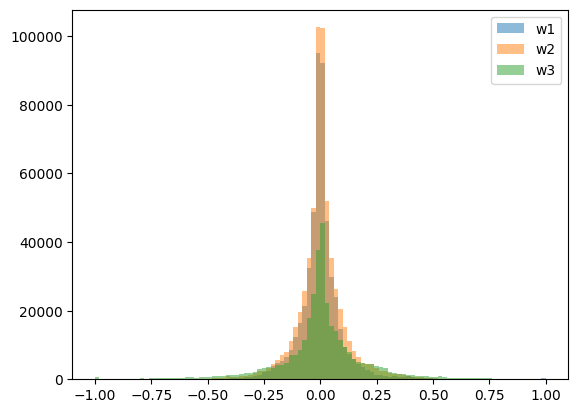

In [47]:
plt.hist(w1[:, 0, :].flatten(), bins=100, alpha=.5, label='w1')
plt.hist(w2[:, 0, :].flatten(), bins=100, alpha=.5, label='w2')
plt.hist(w3[:, 0, :].flatten(), bins=100, alpha=.5, label='w3')
plt.legend()
plt.show()

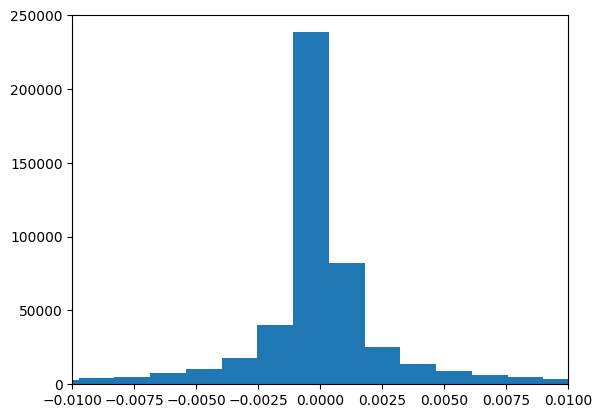

In [56]:
# w1
plt.hist(np.diff(w1[:, 0, :], axis=0).flatten(), bins=1000)
plt.xlim([-.01, .01])
plt.show()

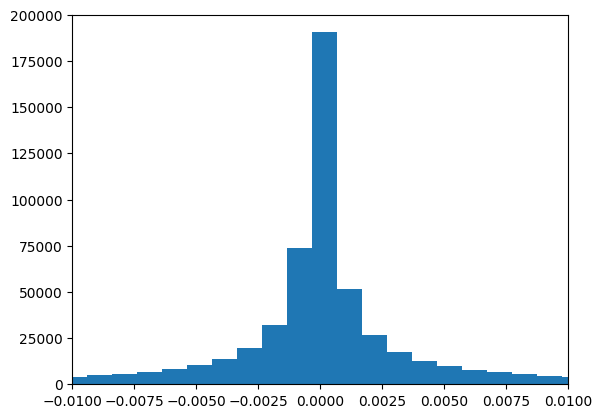

In [57]:
# w2
plt.hist(np.diff(w2[:, 0, :], axis=0).flatten(), bins=1000)
plt.xlim([-.01, .01])
plt.show()

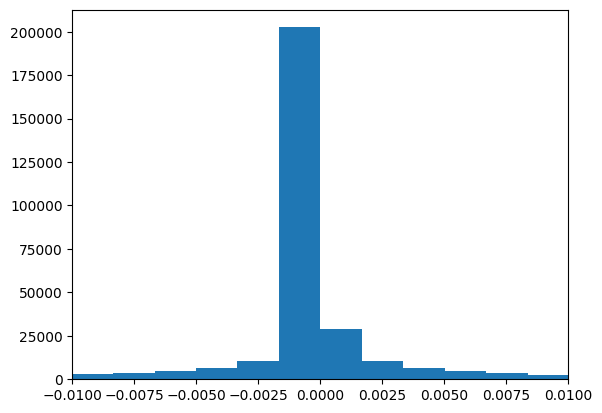

In [58]:
# w3
plt.hist(np.diff(w3[:, 0, :], axis=0).flatten(), bins=1000)
plt.xlim([-.01, .01])
plt.show()

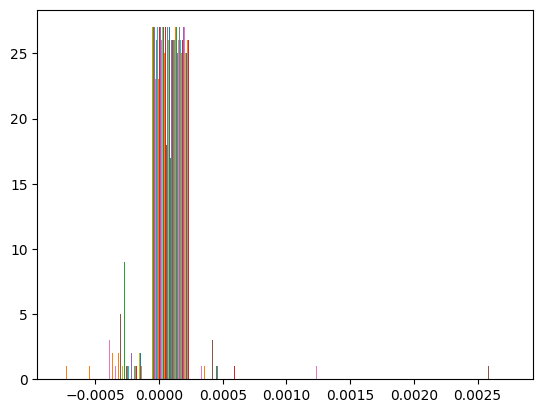

In [31]:
plt.hist(np.mean(np.diff(w1[:, 1, :], axis=0), axis=0))
plt.show()

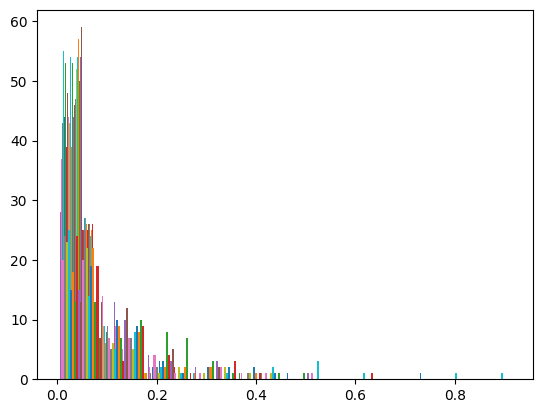

In [19]:
# w1
plt.hist(np.mean(np.diff(w1[:, 0, :], axis=0), axis=0))
plt.show()
# w2
plt.hist(np.mean(np.diff(w2[:, 0, :], axis=0), axis=0))
plt.show()
# w3
plt.hist(np.mean(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

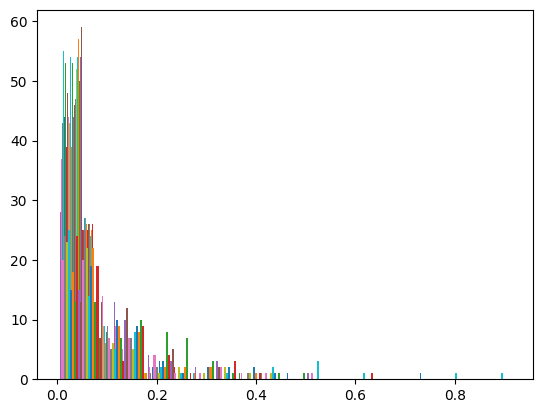

In [20]:
# w1
plt.hist(np.max(np.diff(w1[:, 0, :], axis=0), axis=0))
# plt.show()
# w2
plt.hist(np.max(np.diff(w2[:, 0, :], axis=0), axis=0))
# plt.show()
# w3
plt.hist(np.max(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

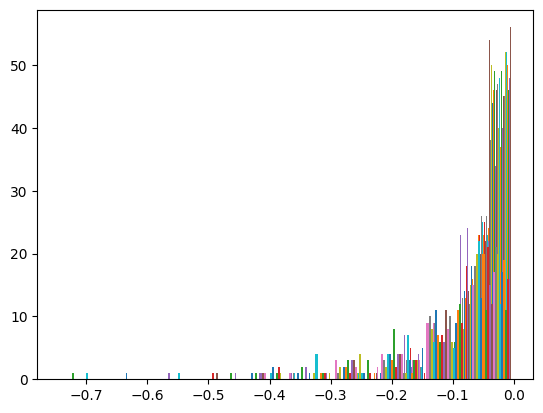

In [23]:
# w1
plt.hist(np.min(np.diff(w1[:, 0, :], axis=0), axis=0))
# plt.show()
# w2
plt.hist(np.min(np.diff(w2[:, 0, :], axis=0), axis=0))
# plt.show()
# w3
plt.hist(np.min(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

### Convert pickle to weight array for real robot

In [8]:
file_name = 'Feedforward_box_trans_tiltL_Best_weight.npy'
data = np.load(file_name)
data


array([ 0.01116791, -1.56322764, -4.01109146, ..., -2.34874455,
        0.70149657,  1.12638691])

In [9]:
# 4 legs FF shape 3648
# 6 legs FF shape 4352
data.shape 


(4352,)

## Oscillatory weight pattern Analysis

### Feedforward model

In [3]:
w1 = np.load('./wak_FF/w1_ff.npy')
w2 = np.load('./wak_FF/w2_ff.npy')
w3 = np.load('./wak_FF/w3_ff.npy')
action = np.load('./wak_FF/actions_ff.npy')
arch = [27, 64, 32, 18]

In [4]:
w1

array([[[[ 0.01116791, -1.56322764, -4.01109146, ..., -0.41182854,
          -1.47785859, -2.15334422],
         [-1.03079377, -4.14689175, -0.19040508, ..., -0.88834024,
          -2.7114634 ,  0.09024179],
         [-2.64020409, -1.02859959, -2.2943126 , ..., -1.91250883,
          -2.15946167, -1.46416092],
         ...,
         [ 0.53282273,  1.41897079, -1.18077773, ..., -1.45950535,
          -6.01954538,  0.59465409],
         [-0.43263606, -0.25177637,  0.69124871, ...,  2.46826683,
           1.93954698,  0.08092276],
         [ 2.35092902, -0.27378482,  0.20363087, ...,  2.78501655,
           2.83253603, -2.30205798]],

        [[ 0.01116791, -1.56322764, -4.01109146, ..., -0.41182854,
          -1.47785859, -2.15334422],
         [-1.03079377, -4.14689175, -0.19040508, ..., -0.88834024,
          -2.7114634 ,  0.09024179],
         [-2.64020409, -1.02859959, -2.2943126 , ..., -1.91250883,
          -2.15946167, -1.46416092],
         ...,
         [ 0.53282273,  1.41897079

In [14]:
n1 = action[:, 0, :]

In [16]:
n1.shape

(300, 18)

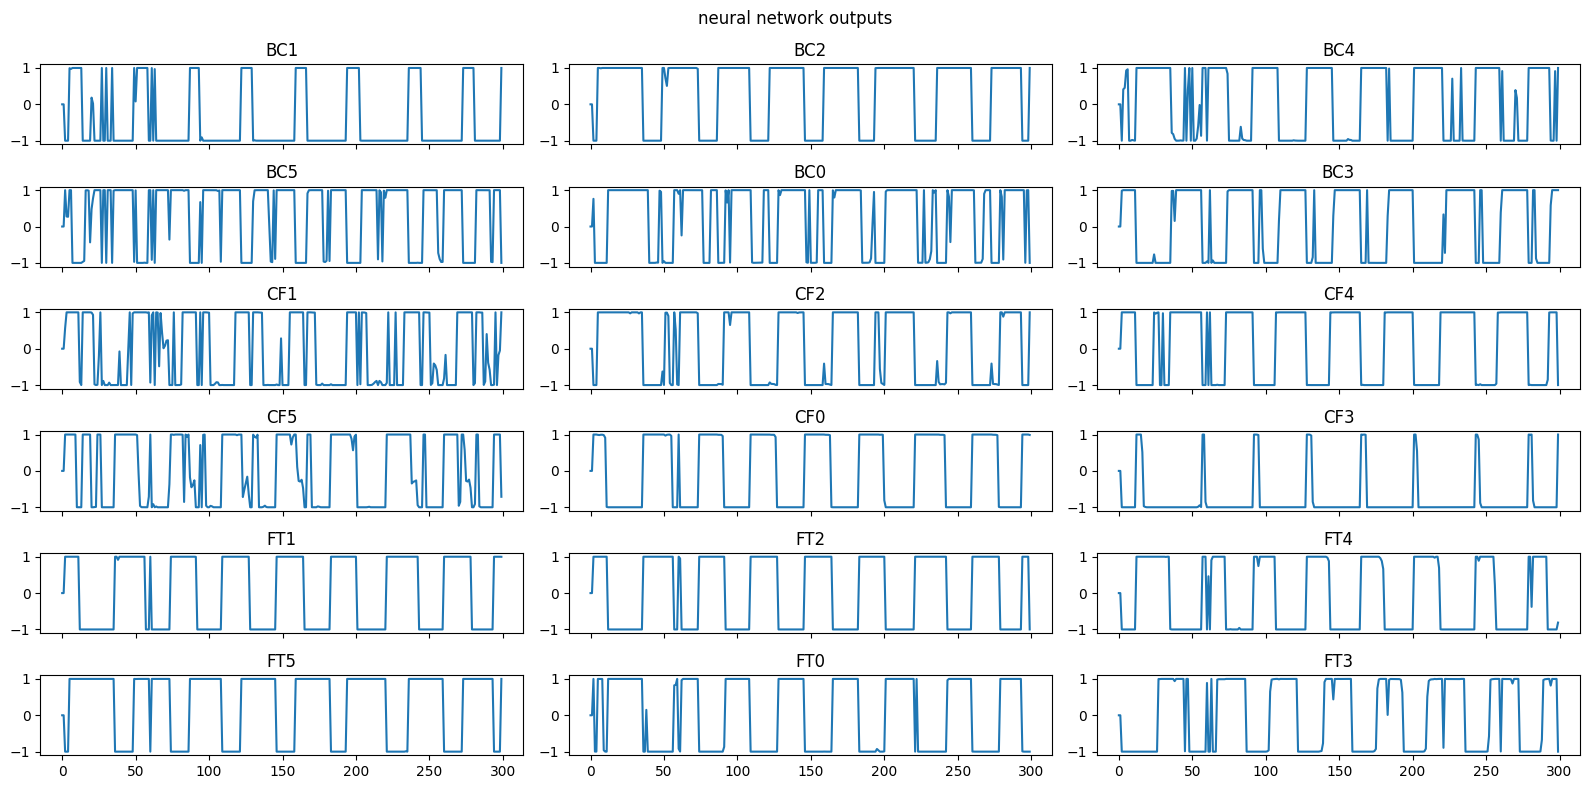

In [32]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('neural network outputs')
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1[:, (i*3)+j])
        axes[i, j].set_title(output_list[(i*3)+j])
fig.tight_layout()

### Hebbian network

In [34]:
w1 = np.load('./walk_hebb/w1_hebb.npy')
w2 = np.load('./walk_hebb/w2_hebb.npy')
w3 = np.load('./walk_hebb/w3_hebb.npy')
action = np.load('./walk_hebb/actions_hebb.npy')
param = np.load('./walk_hebb/param_hebb.npy')
arch = [27, 64, 32, 18]

In [66]:
n1_w1 = w1[:, 0, :]
n1_w2 = w2[:, 0, :]
n1_w3 = w3[:, 0, :]
n1_action = action[:, 0, :]

In [39]:
print('numbe of weight: ', param.shape[0]//5)

numbe of weight:  4352


In [40]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]

In [90]:
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
# index = [3, 6, 12, 15, 4, 7,
#          13, 16, 0, 9, 5, 8,
#          14, 17, 1, 10, 2, 11]
# motorspace --> joint standard space
index = [4, 0, 1, 5, 2, 3, 
         10, 6, 7, 11, 8, 9, 
         16, 12, 13, 17, 14, 15]

In [91]:
np.take(output_list, index)

array(['BC0', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'CF0', 'CF1', 'CF2',
       'CF3', 'CF4', 'CF5', 'FT0', 'FT1', 'FT2', 'FT3', 'FT4', 'FT5'],
      dtype='<U3')

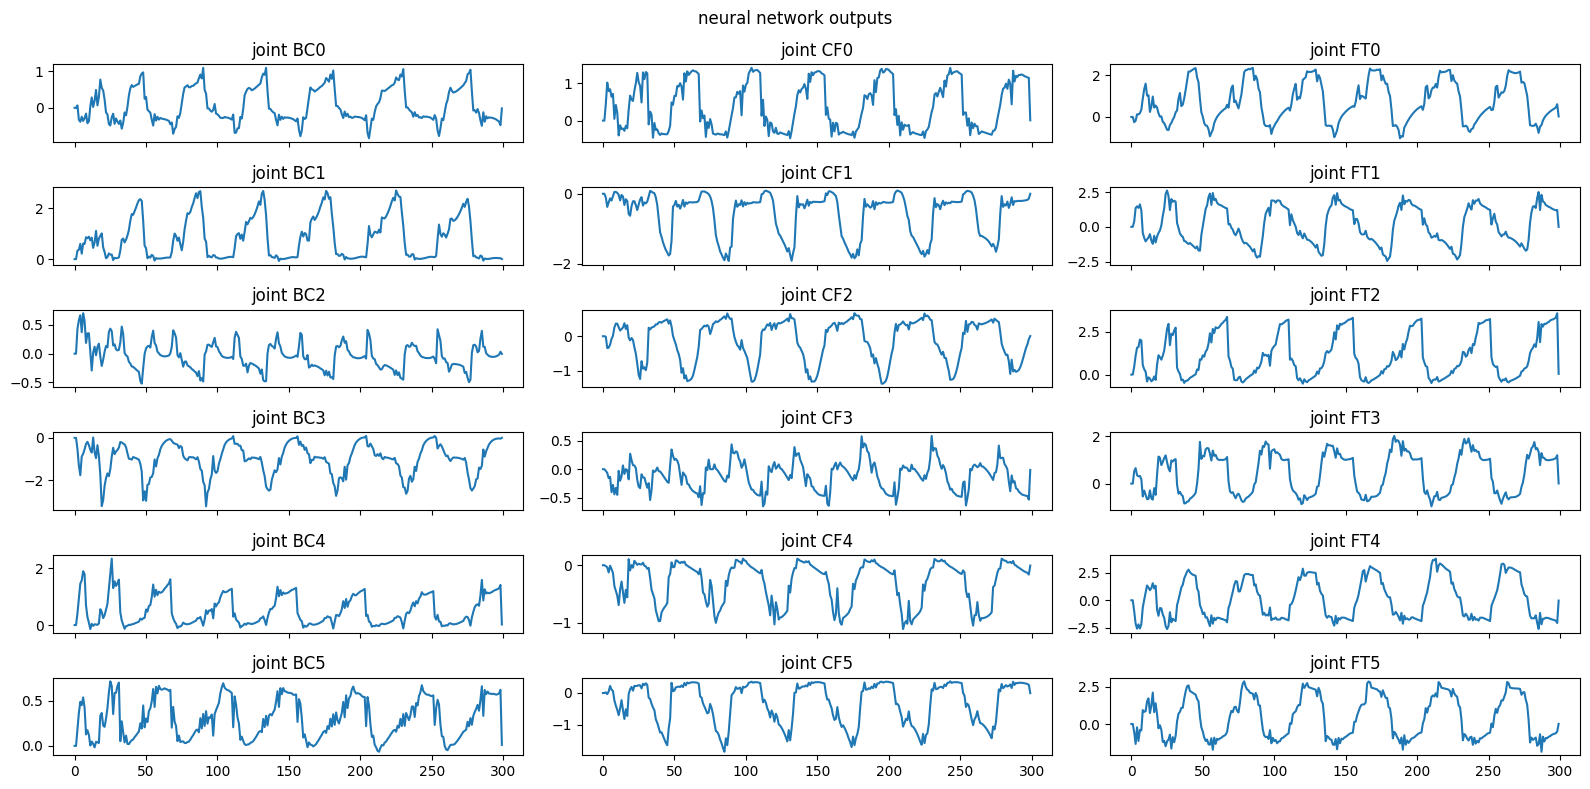

In [99]:
n1_action = action[:, 0, :]
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('neural network outputs')
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
index = [4, 10, 16, 0, 6, 12,
         1, 7, 13, 5, 11, 17,
         2, 8, 14, 3, 9, 15]
output_list = np.take(output_list, index)
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_action[:, index[(i*3)+j]])
        axes[i, j].set_title('joint '+output_list[(i*3)+j])
fig.tight_layout()
plt.savefig('hebb_output.jpg', bbox_inches='tight')

In [76]:
n1_w1[:, 0, 0].shape

(300,)

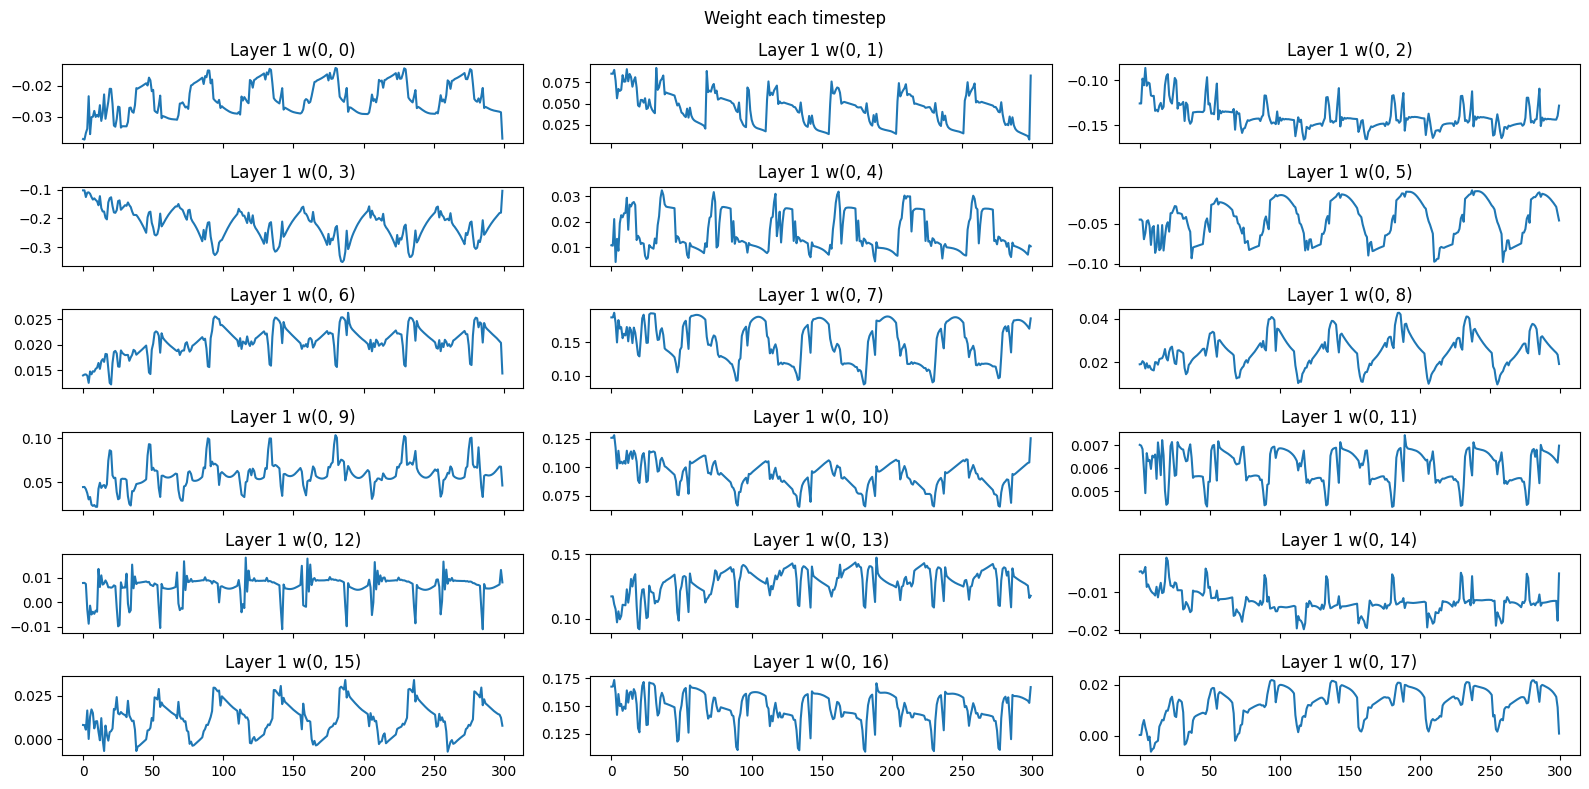

In [96]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w1[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 1 w(0, '+str((i*3)+j)+')')
fig.tight_layout()
plt.savefig('hebb_w1.jpg', bbox_inches='tight')

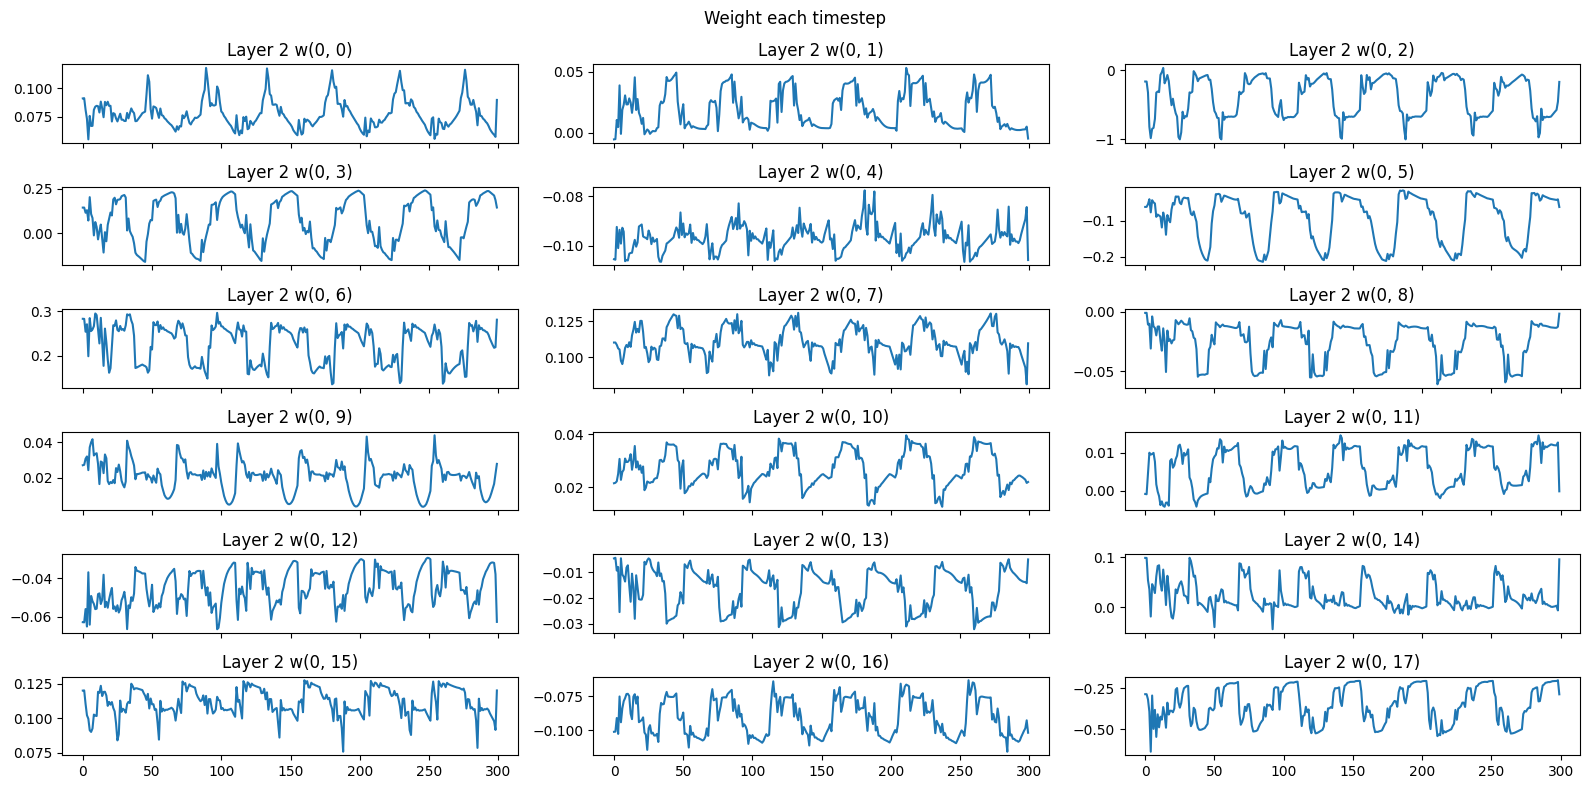

In [97]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w2[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 2 w(0, '+str((i*3)+j)+')')
fig.tight_layout()
plt.savefig('hebb_w2.jpg', bbox_inches='tight')

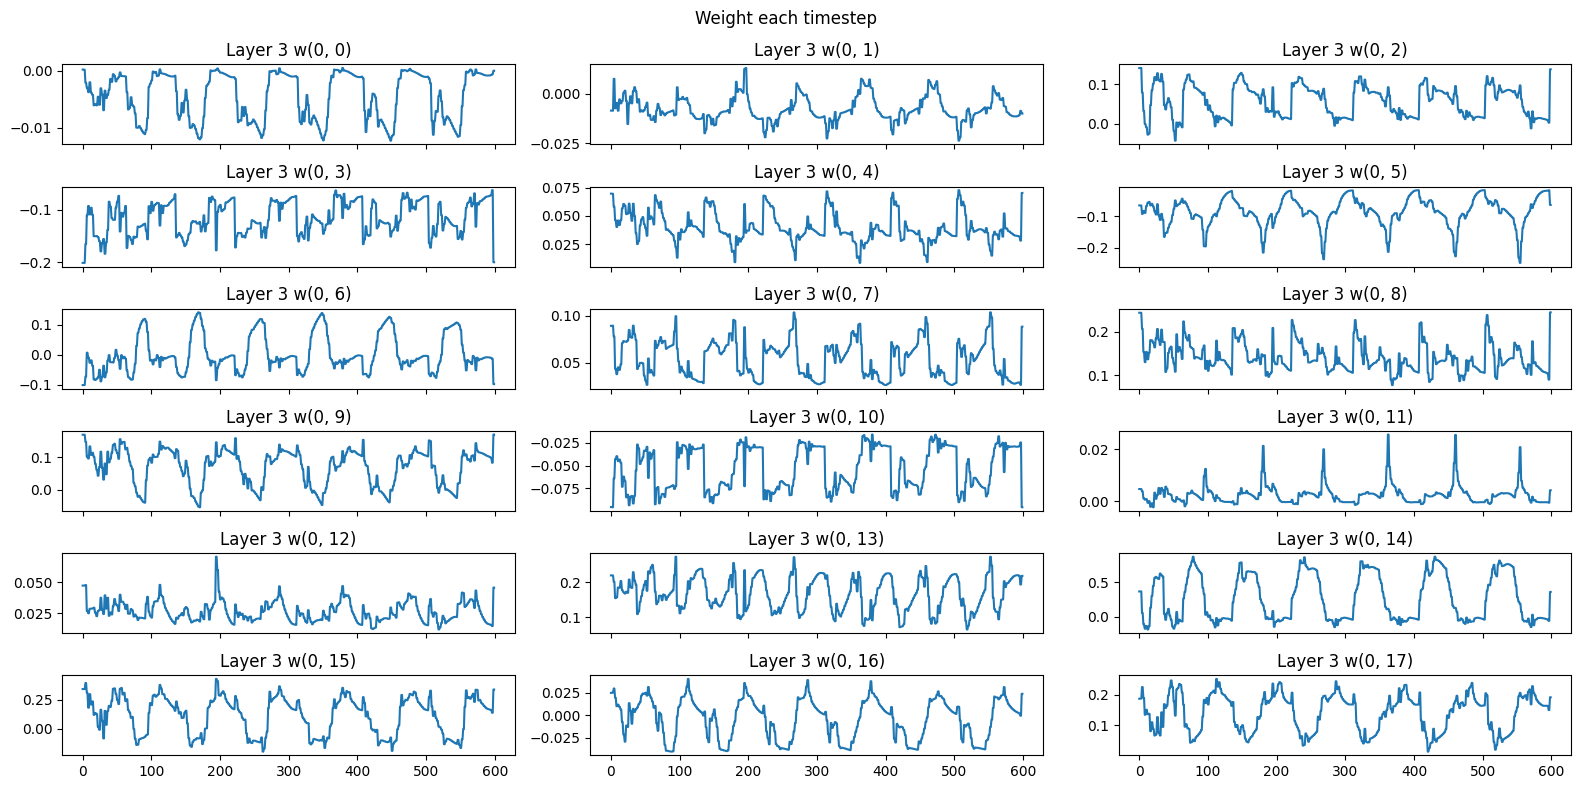

In [98]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w3[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 3 w(0, '+str((i*3)+j)+')')
fig.tight_layout()
plt.savefig('hebb_w3.jpg', bbox_inches='tight')